<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/12week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data
y = iris.target

pd.DataFrame(X, columns = iris.feature_names)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [2]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X)
pd.DataFrame(X_reduced, columns = ["1_?", "2_?", "3_?"])

1_?       2_?       3_?
0   -2.684126  0.319397 -0.027915
1   -2.714142 -0.177001 -0.210464
2   -2.888991 -0.144949  0.017900
3   -2.745343 -0.318299  0.031559
4   -2.728717  0.326755  0.090079
..        ...       ...       ...
145  1.944110  0.187532  0.177825
146  1.527167 -0.375317 -0.121898
147  1.764346  0.078859  0.130482
148  1.900942  0.116628  0.723252
149  1.390189 -0.282661  0.362910

[150 rows x 3 columns]

In [3]:
X_95 = PCA(n_components = 0.95).fit_transform(X)

In [4]:
X_95

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [5]:
pca = PCA(n_components = 3)
X_reduced = pca.fit_transform(X)
X4D = pca.inverse_transform(X_reduced)
pd.DataFrame(X4D, columns = iris.feature_names)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             5.099286          3.500723           1.401086          0.198295
1             4.868758          3.031661           1.447517          0.125368
2             4.693700          3.206384           1.309582          0.184951
3             4.623843          3.075837           1.463736          0.256958
4             5.019326          3.580414           1.370606          0.246168
..                 ...               ...                ...               ...
145           6.565541          3.136265           5.404505          1.978794
146           6.219750          2.581327           5.122055          1.708294
147           6.456778          3.043802           5.265739          1.896748
148           6.185931          3.414258           5.421399          2.266390
149           5.948913          2.950431           5.025606          1.916846

[150 rows x 4 columns]

In [6]:
# 주성분
print("주성분 : \n", pca.components_)

# 표현 분산
print("표현분산 : \n", pca.explained_variance_ratio_)

주성분 : 
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]
표현분산 : 
 [0.92461872 0.05306648 0.01710261]


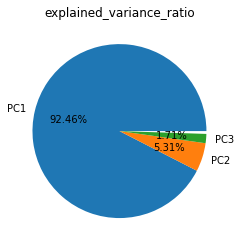

In [7]:
ratio = pca.explained_variance_ratio_
df_v = pd.DataFrame(ratio, index = ['PC1', 'PC2', 'PC3'], columns = ['V_ratio'])
plt.pie(df_v['V_ratio'], labels = df_v.index, autopct = '%.2f%%')
plt.title('explained_variance_ratio')
plt.show()

In [8]:
df_v

V_ratio
PC1  0.924619
PC2  0.053066
PC3  0.017103

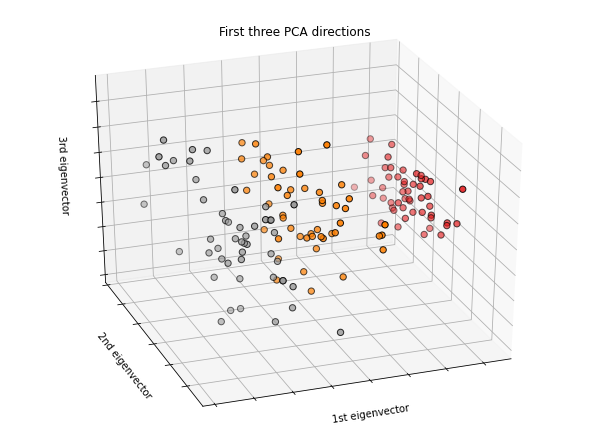

In [11]:
# 줄어든 차원으로 iris 데이터 시각화 하기
fig = plt.figure(1, figsize = (8, 6))
ax = Axes3D(fig, elev = -150, azim = 110)
X_reduced = PCA(n_components = 3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c = y,
    cmap = plt.cm.Set1,
    edgecolor = 'k',
    s = 40
)
ax.set_title("First three PCA directions")
ax.set_xlabel('1st eigenvector')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('2nd eigenvector')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('3rd eigenvector')
ax.w_zaxis.set_ticklabels([])
plt.show()